# CLASSIFICATION DES CURRICULUM VITAE

#### Dans la cellule de code suivante, nous souhaitons importer les bibliothèques dont nous aurons besoin pour notre exploration de données.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file = "raw_data/ResumeDataSet_Catgorized.csv"
cv_df = pd.read_csv(file, decimal=",")
cv_df['Old_Category'].unique()


array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing',
       'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', nan, 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION',
       'JOBS COORDINATOR / ESTIMATOR', 'COURT APPOINTED SPECIAL ADVOCATE',
       'SALES ASSOCIATE', 'PERSONNEL SECURITY SPECIALIST',
       'ROUTE MANAGER', 'SOURCING & MERCHANDISING 

In [39]:
cv_df.head(5)

,Resume,Old_Category,New_Category
0,Skills * Programming Languages: Python (pandas...,Data Science,Technology and IT
1,Skills * Programming Languages: Python (pandas...,Data Science,Technology and IT
2,Skills * Programming Languages: Python (pandas...,Data Science,Technology and IT
3,Skills * Programming Languages: Python (pandas...,Data Science,Technology and IT
4,Education Details \nMay 2013 to May 2017 B.E ...,Data Science,Technology and IT


In [40]:
cv_df.shape

(4022, 3)

In [42]:
cv_df['New_Category'].value_counts()

Sales and Commerce                  525
Arts, Culture, and Entertainment    466
Engineering and Construction        454
Finance and Accounting              393
Administration and Management       363
Health and Life Sciences            291
Marketing and Communication         226
Transport and Logistics             216
Human Resources                     200
Education and Training              173
Technology and IT                   171
Law and Legal                       149
Tourism and Hospitality             143
Personal and Community Services     132
Science and Research                118
Name: New_Category, dtype: int64

In [43]:
cv_df['Old_Category'].value_counts()

HR                                      156
BUSINESS-DEVELOPMENT                    120
INFORMATION-TECHNOLOGY                  120
FINANCE                                 118
ADVOCATE                                118
                                       ... 
HR CONSULTANT                             1
BILINGUAL DOMESTIC VIOLENCE ADVOCATE      1
BENEFIT ADVOCATE SUPERVISOR               1
SENIOR ENGINEERING PROGRAM MANAGER        1
PROGRAM MANAGER & DESIGNER                1
Name: Old_Category, Length: 452, dtype: int64

<AxesSubplot:xlabel='count', ylabel='New_Category'>

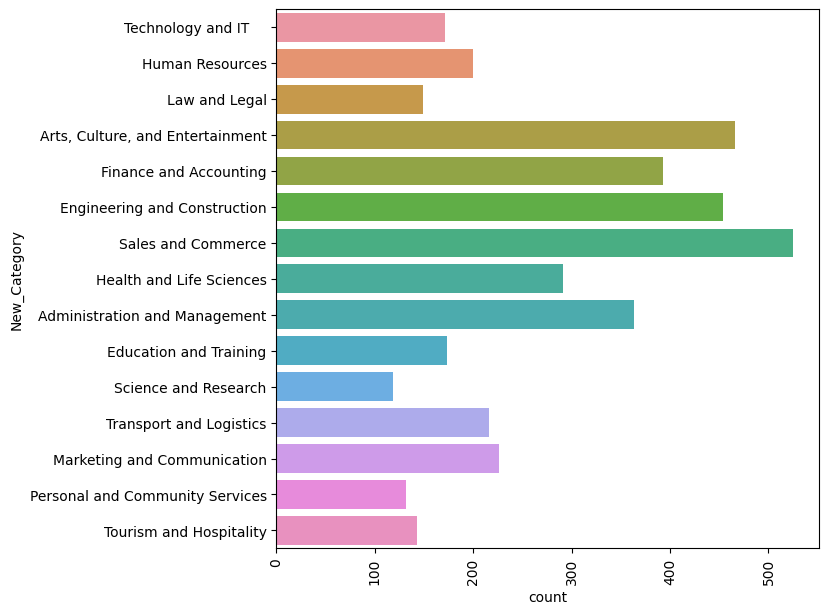

In [45]:
import seaborn as sns
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
sns.countplot(y="New_Category", data=cv_df)

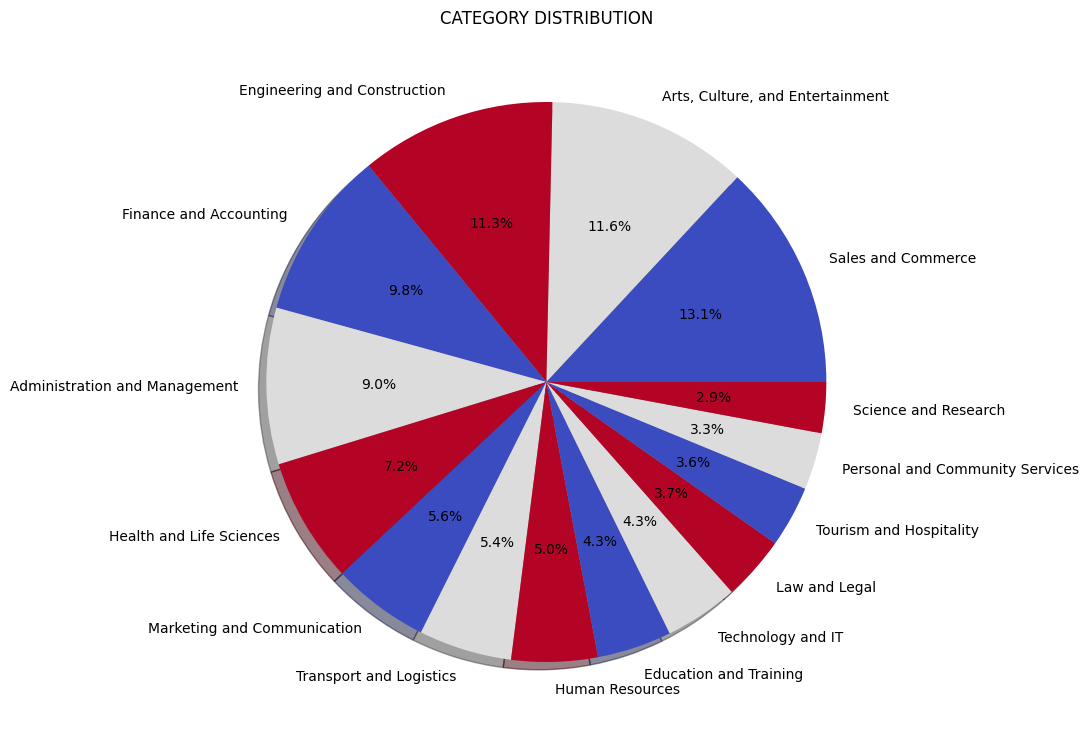

In [47]:
from matplotlib.gridspec import GridSpec
targetCounts = cv_df['New_Category'].value_counts()
targetLabels = targetCounts.index
#targetLabels  = cv_df['New_Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(20,20))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()


In [48]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [49]:
cv_df['CV_cleaned'] = ''
cv_df.head()

,Resume,Old_Category,New_Category,CV_cleaned
0,Skills * Programming Languages: Python (pandas...,Data Science,Technology and IT,
1,Skills * Programming Languages: Python (pandas...,Data Science,Technology and IT,
2,Skills * Programming Languages: Python (pandas...,Data Science,Technology and IT,
3,Skills * Programming Languages: Python (pandas...,Data Science,Technology and IT,
4,Education Details \nMay 2013 to May 2017 B.E ...,Data Science,Technology and IT,


In [50]:
cv_df['CV_cleaned'] = cv_df.Resume.apply(lambda x: cleanResume(x))
print (cv_df['CV_cleaned'])

0       Skills Programming Languages Python pandas num...
1       Skills Programming Languages Python pandas num...
2       Skills Programming Languages Python pandas num...
3       Skills Programming Languages Python pandas num...
4       Education Details May 2013 to May 2017 B E UIT...
                              ...                        
4017     Summary Seasoned Agriculture Teacher with mor...
4018     Summary Dependable and resourceful Instructor...
4019     Summary Candidate with a fifteen months exper...
4020     Summary I have recently completed five years ...
4021     Professional Summary A talented program desig...
Name: CV_cleaned, Length: 4022, dtype: object


In [71]:
cv_df['CV_cleaned'][5]

'Education Details May 2013 to May 2017 B E UIT RGPV Data Scientist Data Scientist Matelabs Skill Details Python Exprience Less than 1 year months Statsmodels Exprience 12 months AWS Exprience Less than 1 year months Machine learning Exprience Less than 1 year months Sklearn Exprience Less than 1 year months Scipy Exprience Less than 1 year months Keras Exprience Less than 1 year monthsCompany Details company Matelabs description ML Platform for business professionals dummies and enthusiasts 60 A Koramangala 5th block Achievements Tasks behind sukh sagar Bengaluru India Developed and deployed auto preprocessing steps of machine learning mainly missing value treatment outlier detection encoding scaling feature selection and dimensionality reduction Deployed automated classification and regression model linkedin com in aditya rathore b4600b146 Reasearch and deployed the time series forecasting model ARIMA SARIMAX Holt winter and Prophet Worked on meta feature extracting problem github co

In [75]:
cv_df.head()

,Resume,Old_Category,New_Category,CV_cleaned
0,Skills * Programming Languages: Python (pandas...,Data Science,Technology and IT,Skills Programming Languages Python pandas num...
1,Skills * Programming Languages: Python (pandas...,Data Science,Technology and IT,Skills Programming Languages Python pandas num...
2,Skills * Programming Languages: Python (pandas...,Data Science,Technology and IT,Skills Programming Languages Python pandas num...
3,Skills * Programming Languages: Python (pandas...,Data Science,Technology and IT,Skills Programming Languages Python pandas num...
4,Education Details \nMay 2013 to May 2017 B.E ...,Data Science,Technology and IT,Education Details May 2013 to May 2017 B E UIT...


In [74]:
[text.strip() for text in cv_df['CV_cleaned']]
cv_df['CV_cleaned'].head(6)

0    Skills Programming Languages Python pandas num...
1    Skills Programming Languages Python pandas num...
2    Skills Programming Languages Python pandas num...
3    Skills Programming Languages Python pandas num...
4    Education Details May 2013 to May 2017 B E UIT...
5    Education Details May 2013 to May 2017 B E UIT...
Name: CV_cleaned, dtype: object

In [77]:
! pip install wordcloud
! pip install nltk
#pip install wordcloud
import nltk
nltk.download('stopwords')


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


[nltk_data] Downloading package stopwords to /Users/hamza/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud


oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = cv_df['Resume'].values
cleanedSentences = ""
for i in range(0,16):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)


[('months', 124), ('Exprience', 108), ('year', 84), ('data', 80), ('1', 80), ('Less', 76), ('Python', 72), ('SAP', 68), ('Analytics', 52), ('HANA', 52), ('Details', 48), ('SQL', 48), ('Industry', 48), ('Technical', 44), ('I', 44), ('Data', 40), ('models', 40), ('various', 40), ('analysis', 36), ('The', 36), ('involved', 36), ('Environment', 36), ('analytics', 32), ('Consultant', 32), ('reports', 28), ('development', 28), ('information', 28), ('A', 28), ('project', 28), ('Role', 28), ('Key', 28), ('Responsibilities', 28), ('Tableau', 24), ('6', 24), ('company', 24), ('tool', 24), ('using', 24), ('January', 24), ('R', 24), ('Develop', 24), ('learning', 20), ('js', 20), ('description', 20), ('modelling', 20), ('Developed', 20), ('reporting', 20), ('insights', 20), ('Server', 20), ('Programming', 16), ('Machine', 16)]


In [55]:
import nltk
#nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk import word_tokenize
len(stopwords.words('english'))

179

In [64]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

ds_df = cv_df[cv_df.New_Category == 'Data Science']
resumes = ""
total_words = []

# Concaténer tous les CV dans la variable resumes
for resume in ds_df["CV_cleaned"]:
    resumes += resume

# Tokenizer le texte concaténé
words = word_tokenize(resumes)

# Filtrer les mots
for word in words:
    if word.lower() not in set(stopwords.words('english')) and word not in string.punctuation:
        total_words.append(word)
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)


[('months', 124), ('Exprience', 108), ('year', 84), ('data', 80), ('1', 80), ('Less', 76), ('Python', 72), ('SAP', 68), ('Analytics', 52), ('HANA', 52), ('Details', 48), ('SQL', 48), ('Industry', 48), ('Technical', 44), ('I', 44), ('Data', 40), ('models', 40), ('various', 40), ('analysis', 36), ('The', 36), ('involved', 36), ('Environment', 36), ('analytics', 32), ('Consultant', 32), ('reports', 28), ('development', 28), ('information', 28), ('A', 28), ('project', 28), ('Role', 28), ('Key', 28), ('Responsibilities', 28), ('Tableau', 24), ('6', 24), ('company', 24), ('tool', 24), ('using', 24), ('January', 24), ('R', 24), ('Develop', 24), ('learning', 20), ('js', 20), ('description', 20), ('modelling', 20), ('Developed', 20), ('reporting', 20), ('insights', 20), ('Server', 20), ('Programming', 16), ('Machine', 16)]
